In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = [15,6] 


In [3]:
df = pd.read_excel('base_volume_portos.xlsx')
df.head()

,PLANTA_PROCESSO,DATA,VALOR
0,1068 - Ponta da Madeira - DESCARGA,2017-11-26 12:00:00,544637.369
1,1068 - Ponta da Madeira - DESCARGA,2017-09-30 12:00:00,620277.046
2,1068 - Ponta da Madeira - DESCARGA,2017-11-08 12:00:00,594958.396
3,1068 - Ponta da Madeira - DESCARGA,2017-10-01 12:00:00,510817.965
4,1068 - Ponta da Madeira - DESCARGA,2017-10-27 12:00:00,495161.796


In [4]:
df['PLANTA_PROCESSO'].unique()

array(['1068 - Ponta da Madeira - DESCARGA',
       '1068 - Ponta da Madeira - EMBARQUE', '1089 - Tubarão - DESCARGA',
       '1089 - Tubarão - EMBARQUE', '1123 - Guaíba - DESCARGA',
       '1123 - Guaíba - EMBARQUE',
       '1159 - VALE OMAN DC - SOHAR - EMBARQUE', '4131 - CBPS - DESCARGA',
       '4131 - CBPS - EMBARQUE'], dtype=object)

In [5]:
df_2 = df[df['PLANTA_PROCESSO'] == "1089 - Tubarão - EMBARQUE"]

In [6]:
df_2.head()

,PLANTA_PROCESSO,DATA,VALOR
3420,1089 - Tubarão - EMBARQUE,2017-11-26 12:00:00,307499.637
3433,1089 - Tubarão - EMBARQUE,2017-11-29 12:00:00,142438.114
3480,1089 - Tubarão - EMBARQUE,2018-02-18 12:00:00,271962.454
3493,1089 - Tubarão - EMBARQUE,2018-03-13 12:00:00,92725.007
3540,1089 - Tubarão - EMBARQUE,2018-02-25 12:00:00,321777.591


In [7]:
df_g = df_2.resample(rule='M', on='DATA')['VALOR'].sum()
df_g.shape

(61,)

In [8]:
titulo_grafico = df_2['PLANTA_PROCESSO'].unique()[0]

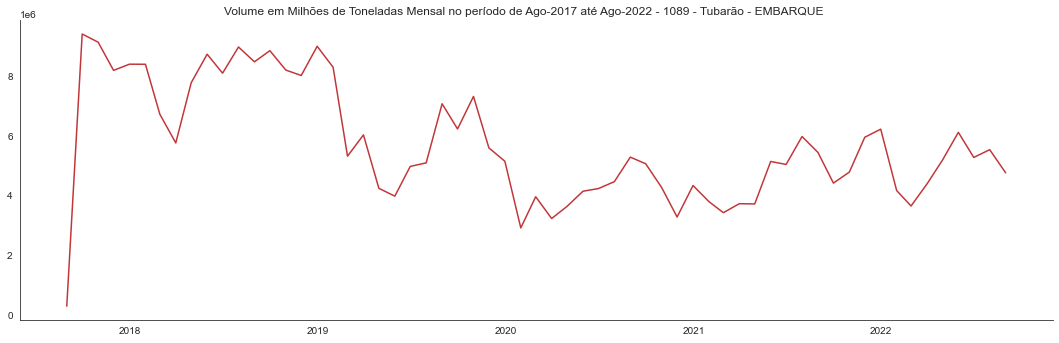

In [9]:
import seaborn as sns
sns.set_style("white")
sns.set_palette("RdBu")
g = sns.relplot(data=df_g, kind='line', height=5, aspect=3,errorbar=None)
g.fig.suptitle('Volume em Milhões de Toneladas Mensal no período de Ago-2017 até Ago-2022 - ' + titulo_grafico)
g.set(xlabel="",
      ylabel="");

### Prática de um modelo com Médias Móveis

In [10]:
#Número de períodos que dão a melhor performance para média móvel
optimal_n = None
#Melhor índice de MSE
best_mse = None

In [11]:
df_3 = df_2[(df_2['DATA'] >= '2022-07-01 12:00:00') & (df_2["DATA"] < '2022-08-20 12:00:00')]

In [12]:
df_3.sort_values('DATA').reset_index()

,index,PLANTA_PROCESSO,DATA,VALOR
0,9359,1089 - Tubarão - EMBARQUE,2022-07-01 12:00:00,138243.282
1,10082,1089 - Tubarão - EMBARQUE,2022-07-02 12:00:00,238374.160
2,7032,1089 - Tubarão - EMBARQUE,2022-07-03 12:00:00,150788.553
3,9100,1089 - Tubarão - EMBARQUE,2022-07-04 12:00:00,186094.919
4,5582,1089 - Tubarão - EMBARQUE,2022-07-05 12:00:00,81080.980
5,5409,1089 - Tubarão - EMBARQUE,2022-07-06 12:00:00,300005.254
6,6523,1089 - Tubarão - EMBARQUE,2022-07-07 12:00:00,297072.313
7,7850,1089 - Tubarão - EMBARQUE,2022-07-08 12:00:00,335698.901
8,5908,1089 - Tubarão - EMBARQUE,2022-07-09 12:00:00,259752.222
9,6139,1089 - Tubarão - EMBARQUE,2022-07-10 12:00:00,115765.196


In [13]:
#Usar na criação dos modelos. a Função gera um array de zeros do tamanho do número de elementos da Série
db = df_3[['VALOR']].values.astype('float32')
media_resultados_para_todas_possiveis_n_value = np.zeros(int(len(db) / 2 - 2))

In [14]:
#Dois laços para buscar a melhor performance

#Três períodos
for n in range(3, int(len(db) / 2 + 1)):
    media_para_n = np.zeros(len(db)-n)
    for i in range(0,len(db) - n):
        media_para_n[i] = np.power(np.mean(db[:,0][i:i+n]) - db[i + n][0],2)
    media_resultados_para_todas_possiveis_n_value[n-3] = np.mean(media_para_n)

optimal_n = np.argmin(media_resultados_para_todas_possiveis_n_value) + 3
best_mse = np.min(media_resultados_para_todas_possiveis_n_value)

print("MSE = %s" % media_resultados_para_todas_possiveis_n_value)
print("Melhor MSE = %s" % best_mse)
print("Ótimo n = %s" % optimal_n)


MSE = [1.04618778e+10 9.16131893e+09 8.69269882e+09 8.67154841e+09
 8.37664989e+09 8.77828800e+09 8.23754730e+09 8.43235229e+09
 8.31573605e+09 8.35428245e+09 8.40698268e+09 8.88004893e+09
 7.88181691e+09 7.54170399e+09 7.33387740e+09 7.04919848e+09
 7.02413569e+09 6.79164436e+09 7.13903171e+09 7.24798472e+09
 7.56679015e+09]
Melhor MSE = 6791644357.494699
Ótimo n = 20


In [15]:
df_5 = df_2[(df_2['DATA'] == '2022-08-20 12:00:00')]
print("MA do dia 20/08 = %s" % np.mean(db[:,0][len(db)-optimal_n:len(db)]))
print("Fato do dia 20/08 = %s" % df_5['VALOR'].values)

MA do dia 20/08 = 156138.17
Fato do dia 20/08 = [141942.049]


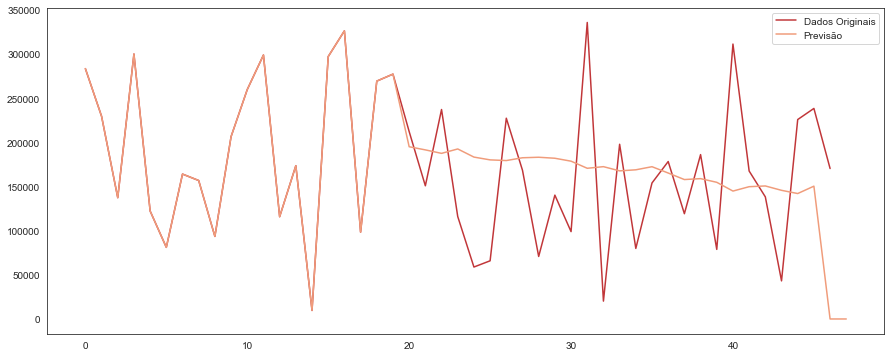

In [17]:
forecast = np.zeros(len(db)+ 1)
for i in range(0, optimal_n):
    forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n - 1):
    forecast[i+optimal_n] = np.mean(db[:,0][i:i+optimal_n])
plt.plot(db[:,0], label='Dados Originais')
plt.plot(forecast, label='Previsão')
plt.legend()
plt.show()

In [18]:
forecast

array([283469.8125    , 229534.203125  , 137307.578125  , 300005.25      ,
       122265.6015625 ,  81080.9765625 , 164046.5625    , 156762.890625  ,
        93477.53125   , 206479.734375  , 259752.21875   , 298848.0625    ,
       115765.1953125 , 173566.328125  ,   9652.12304688, 297072.3125    ,
       326196.03125   ,  98268.40625   , 269303.21875   , 277219.        ,
       195003.65625   , 191438.5625    , 187501.28125   , 192493.21875   ,
       183293.28125   , 180120.609375  , 179360.        , 182522.5       ,
       183102.390625  , 181967.203125  , 178653.46875   , 170611.46875   ,
       172454.        , 167676.96875   , 168888.53125   , 172399.15625   ,
       165244.984375  , 157848.21875   , 158893.46875   , 154733.046875  ,
       144811.09375   , 149764.78125   , 150600.640625  , 145655.46875   ,
       142011.78125   , 150360.5625    ,      0.        ,      0.        ])